In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

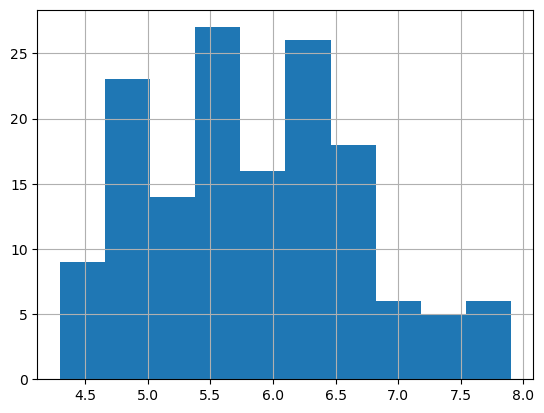

In [7]:
df['sepal_length'].hist()

<Axes: >

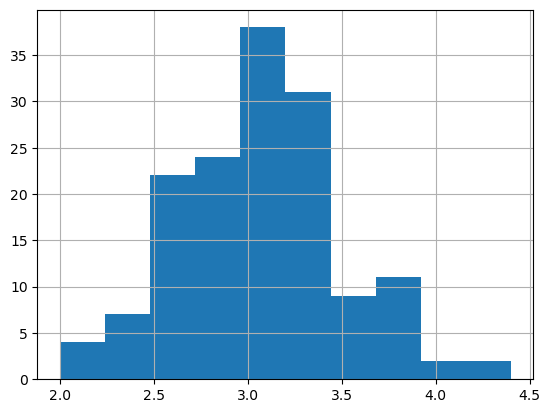

In [8]:
df['sepal_width'].hist()

<Axes: >

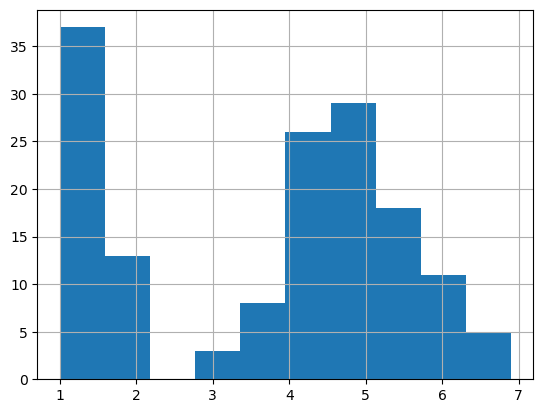

In [9]:
df['petal_length'].hist()

<Axes: >

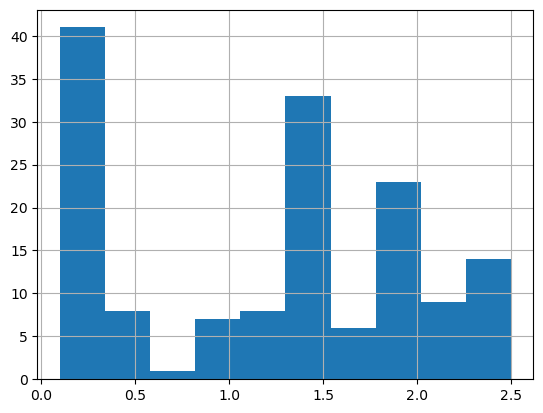

In [10]:
df['petal_width'].hist()

In [11]:
colors=['yellow','green','pink']
species= ['Iris-setosa','Iris-versicolor', 'Iris-virginica']

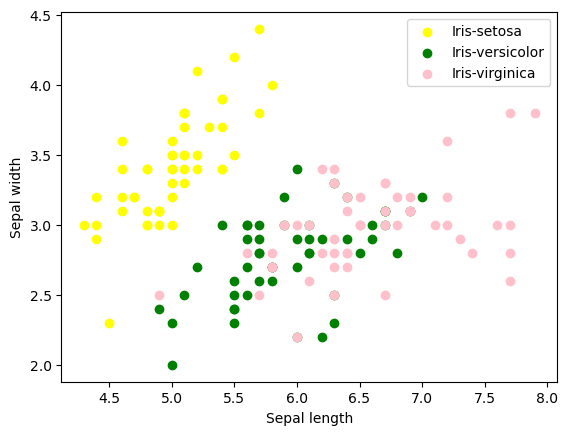

In [12]:
for i in range(3):
    x= df[df['species']== species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c= colors[i], label= species[i])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()

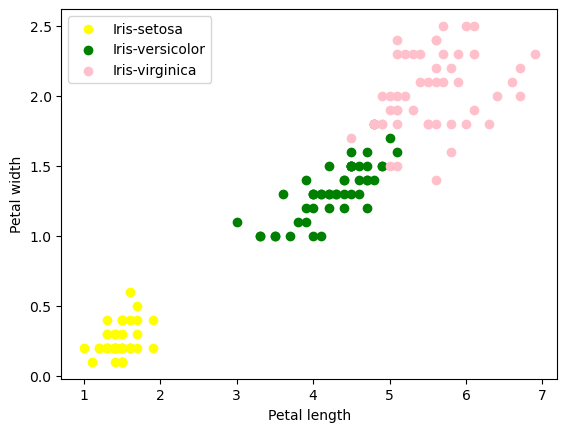

In [13]:
for i in range(3):
    x= df[df['species']== species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c= colors[i], label= species[i])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()

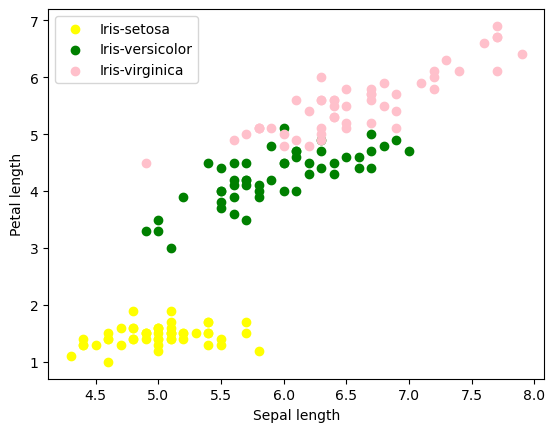

In [14]:
for i in range(3):
    x= df[df['species']== species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c= colors[i], label= species[i])
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend()

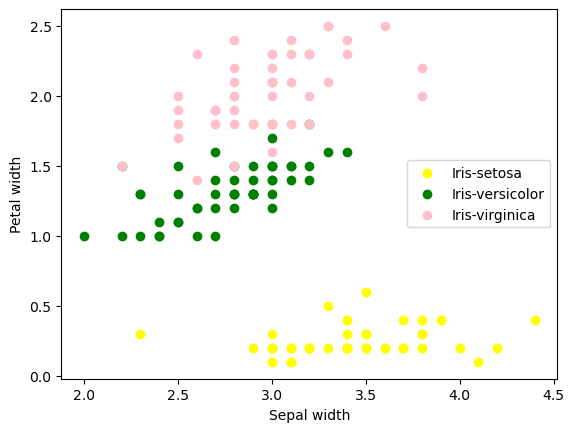

In [15]:
for i in range(3):
    x= df[df['species']== species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c= colors[i], label= species[i])
plt.xlabel("Sepal width")
plt.ylabel("Petal width")
plt.legend()

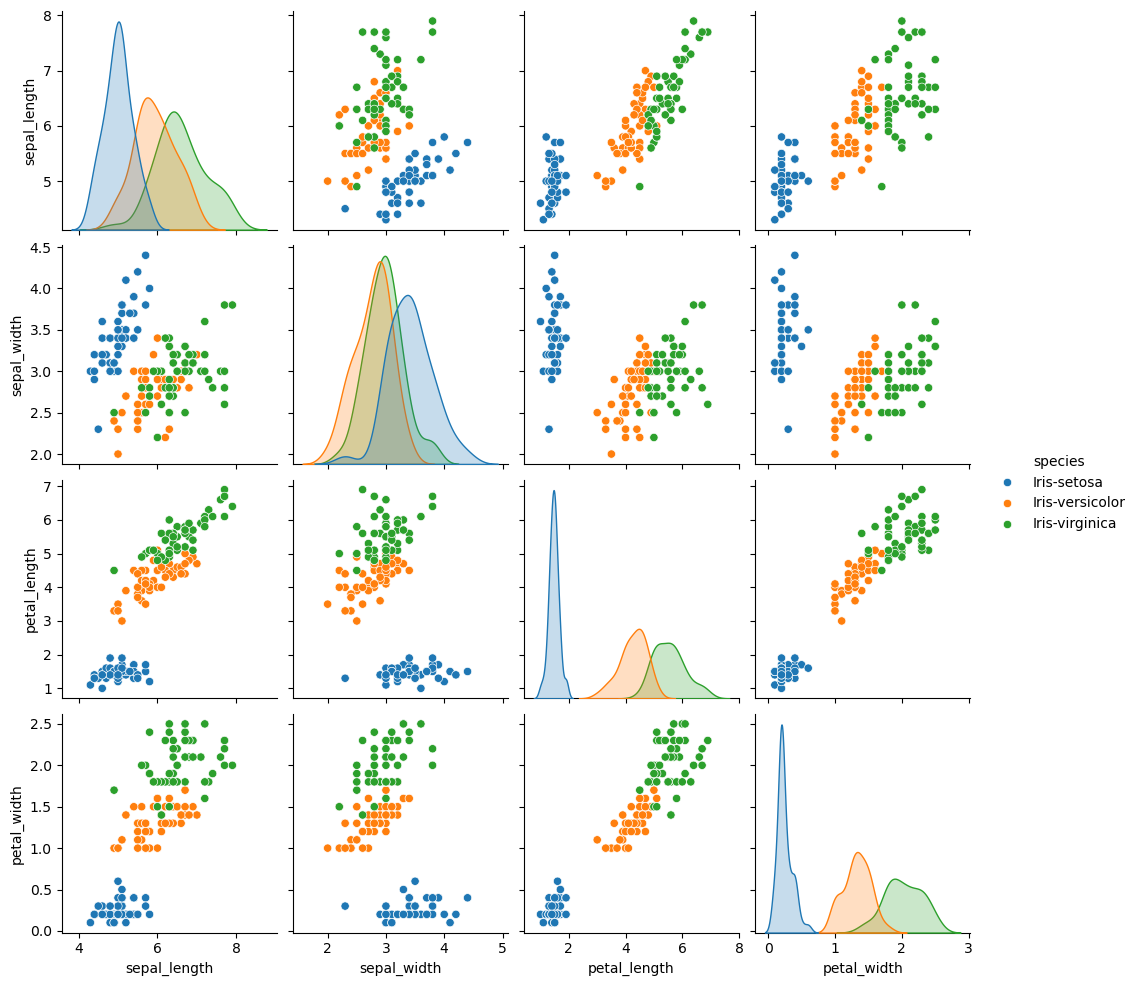

In [16]:
sns.pairplot(df,hue ='species')

In [17]:
training_data = df[0:104]
training_results = training_data['species']
training_data = training_data.drop(columns='species')

testing_data = df[105::]
testing_results = testing_data['species']
testing_data = testing_data.drop(columns='species')

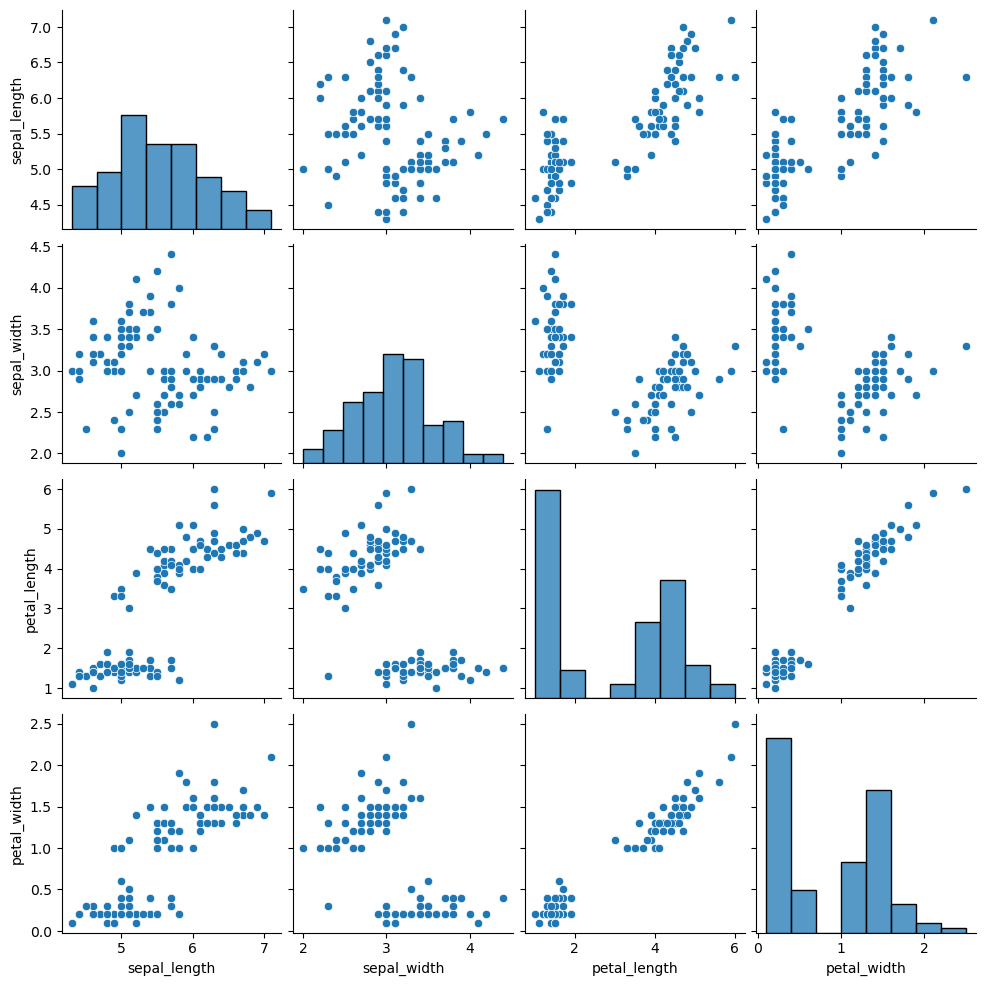

In [18]:
sns.pairplot(training_data)

In [19]:
df.corr(numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

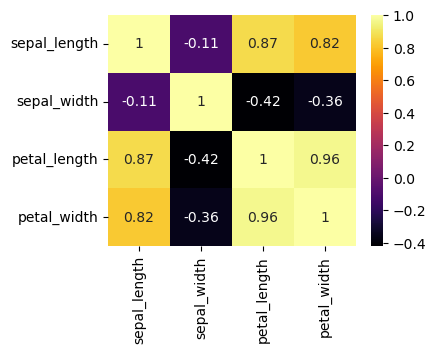

In [20]:
corr = df.corr(numeric_only = True)
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(corr, annot=True, ax= ax, cmap = 'inferno')

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
df = pd.read_csv('Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.33)


In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
model.fit(x_train, y_train)

LogisticRegression()

In [27]:
print("Accuracy: ",model.score(x_test, y_test)* 100)


Accuracy:  96.0


In [28]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [29]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [30]:
print("Accuracy: ",model.score(x_test, y_test)* 100)

Accuracy:  94.0


In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [32]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
print("Accuracy: ",model.score(x_test, y_test)* 100)

Accuracy:  94.0
